In [2]:
! pip install -q chart_studio
! pip install -q bqplot
! pip install -q pingouin
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
import os
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
import plotly.graph_objects as go



# Introducción


### Objetivos
    Predecir si un cliente permanecera utilizando la tarjeta de credito
    Detectar las variables y los valores criticos que provocan el abandono del servicio.

### Abstract
    En la actualidad, la tarjeta de crédito es un medio de pago esencial para compras de alto valor. Para los comerciantes, aceptar pagos con tarjeta de crédito significa un crecimiento significativo en las ventas, mientras que, para los clientes, es una forma necesaria para adquirir bienes costosos.
    La utilidad de esta investigación para conocer la necesidad de los clientes, que comportamientos conllevan a mantener su relación con el banco, como motivar a los clientes una mayor utilización de la tarjeta de crédito, poder anticiparse ante su eventual salida, intentando la retención del cliente con intención de abandono del sistema crediticio del banco.
    Para poder desarrollar el modelo que determine detectar las variables criticas del abandono del cliente se utilizara un modelo de regresión y para predecir si el cliente se mantiene activo se utilizara la cauterización.

    

### Contexto comercial 
    Dado que el mercado es altamente competitivo, especialmente con la llegada de tarjetas no bancarias emitidas por bancos virtuales en los últimos años, por lo tanto es crucial para los proveedores de tarjetas de crédito atraer a más clientes y fomentar su lealtad a largo plazo. La mayor ventaja que posee este tipo de entidades es que cualquier persona puede acceder a ellas en comparacion de las entidades bancarias, siendo los principales beneficiarios los paises latino americanos o tercermundista por el cambiante entorno economico y por la existencia de una gran cantidad de personas que trabajan en el mercado informal. Tambien suelen tener menor control fiscal pudiendo existir una mayor facilidad de evasion impositiva. Otra estrategia que han adoptado últimamente para captar mayor inversion por parte de sus clientes es un sistema en donde se puede invertir el dinero en la cuenta para que le generen beneficios, obteniendo ingresos pasivos, este sistema a pesar de contar con un menor interes que el plazo fijo, en el sistema bancario tradicional lo compensa con la liquidez inmediata.
    
    Sin embargo estar dentro del sistema bancario tradicional tambien tiene sus ventajas. La principal es que depende el negocio puede o no aceptar como pago electronico el uso de los sistemas no bancarizados, tambien suelen acceder a intereses especiales (como podria ser el caso del programa nacional de cuotas ahora en Argentina, en donde el interes de los distintos planes ademas de ser muy inferior al tradicional es inferior a la inflacion del pais) y descuentos especiales.


### Problema
    ¿Qué factores son determinantes para poder determinar la fidelidad del uso de una tarjeta de credito?
    ¿Que valores o combinacion de ellos son los que provocan el abandono del servicio crediticio?

### Contexto analitico
    Un gerente del banco necesita conocer el motivo del porque cada vez más clientes abandonan sus servicios de tarjeta de crédito.  Para que el banco pueda ir proactivamente al cliente para brindarle mejores servicios y cambiar las decisiones de los clientes en la dirección opuesta, logrando de esta manera que el cliente permanezca en el servicio la mayor cantidad de tiempo. 
    
    Dentro de las acciones planteadas por la gerencia para poder mejorar la permanencia con la tarjeta se encuentra un sistema de puntos, beneficios como descuentos en tiendas o supermercado y la posibilidad de refinanciar deudas crediticias.


### Hipótesis
    Los factores más determinantes para poder determinar el riesgo crediticio es el nivel de ingresos de las personas, Límite de crédito en la tarjeta de crédito y el Saldo rotatorio total en la tarjeta de crédito (compras del periodo + saldos pendientes de pago de periodos anteriores). Por otra parte, otros elementos importantes serian Nº de meses inactivos en los últimos 12 meses,Cambio en el monto de la transacción (Q4 sobre Q1),Ratio de uso medio de la tarjeta y la categoria de la tarjeta que posea. Siendo el resto de los factores pocos influyentes 

# Cargar dataset

In [3]:
df=pd.read_csv(r'C:\Users\Usuario\OneDrive\Escritorio\CODERHOUSE\DATA SCIENSE\BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


Las variables que se representan en las columnas para este data set son:

*CLIENTNUM: Numero de cliente. Identificador único del cliente titular de la cuenta

*Attrition_Flag: Variable de evento interno (actividad del cliente): si la cuenta está cerrada, entonces 1 si no 0

*Customer_Age: Variable demográfica - Edad del cliente en años

*Gender: Variable demográfica - M=Hombre, F=Mujer

*Dependent_count: Variable demográfica - Número de dependientes

*Education_Level: Variable demográfica - Calificación educativa del titular de la cuenta (ejemplo: escuela secundaria, graduado universitario, etc.)

*Marital_Status: Variable demográfica - Casada, Soltera, Divorciada, Desconocida

*Income_Category: Variable demográfica - Categoría de ingreso anual del titular de la cuenta (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >

*Card_Category: Producto Variable - Tipo de Tarjeta (Azul, Plata, Oro, Platino)

*Months_on_book: Periodo de relación con el banco

*Total_Relationship_count: Número total de productos en poder del cliente

*Months_Inactive_12_mon: Nº de meses inactivos en los últimos 12 meses

*Contacts_Count_12_mon: No. de Contactos en los últimos 12 meses

*Credit_Limit: Límite de crédito en la tarjeta de crédito

*Total_Revolving_Bal: Saldo rotatorio total en la tarjeta de crédito

*Avg_Open_To_Buy: Línea de crédito abierta para comprar (promedio de los últimos 12 meses)

*Total_Amt_Chng_Q4_Q1: 	Cambio en el monto de la transacción (Q4 sobre Q1)

*Total_Trans_Amt: 	Importe total de la transacción (últimos 12 meses)

*Total_Trans_Ct: Recuento total de transacciones (últimos 12 meses)

*Total_Ct_Chng_Q4_Q1: Cambio en el recuento de transacciones (Q4 sobre Q1)

*Avg_Utilization_Ratio: Ratio de uso medio de la tarjeta

*Naive_Bayes_Classifier_attribution: Naive Bayes

*Naive_Bayes_Classifier_attribution: Naive Bayes

# Modificando el dataset

In [4]:
df=df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [5]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [6]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

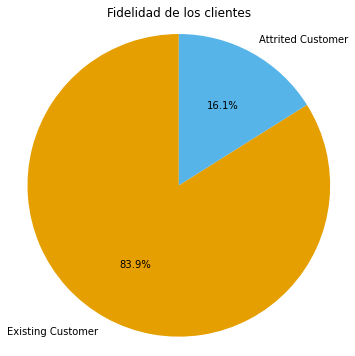

In [7]:
labels = ['Existing Customer', 'Attrited Customer']
sizes = [8500,1627]

colors = ['#E69F00', '#56B4E9']

plt.figure(figsize=(6, 6))
sns.set_palette(sns.color_palette(colors))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Fidelidad de los clientes')
plt.show()



# Data Wrangling

In [8]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## Valores nulos

In [9]:
df.isnull().values.any()

False

In [10]:
df.isna().sum().sort_values(ascending=False)

CLIENTNUM                   0
Months_Inactive_12_mon      0
Total_Ct_Chng_Q4_Q1         0
Total_Trans_Ct              0
Total_Trans_Amt             0
Total_Amt_Chng_Q4_Q1        0
Avg_Open_To_Buy             0
Total_Revolving_Bal         0
Credit_Limit                0
Contacts_Count_12_mon       0
Total_Relationship_Count    0
Attrition_Flag              0
Months_on_book              0
Card_Category               0
Income_Category             0
Marital_Status              0
Education_Level             0
Dependent_count             0
Gender                      0
Customer_Age                0
Avg_Utilization_Ratio       0
dtype: int64

In [11]:
df.duplicated().sum()

0

<AxesSubplot:>

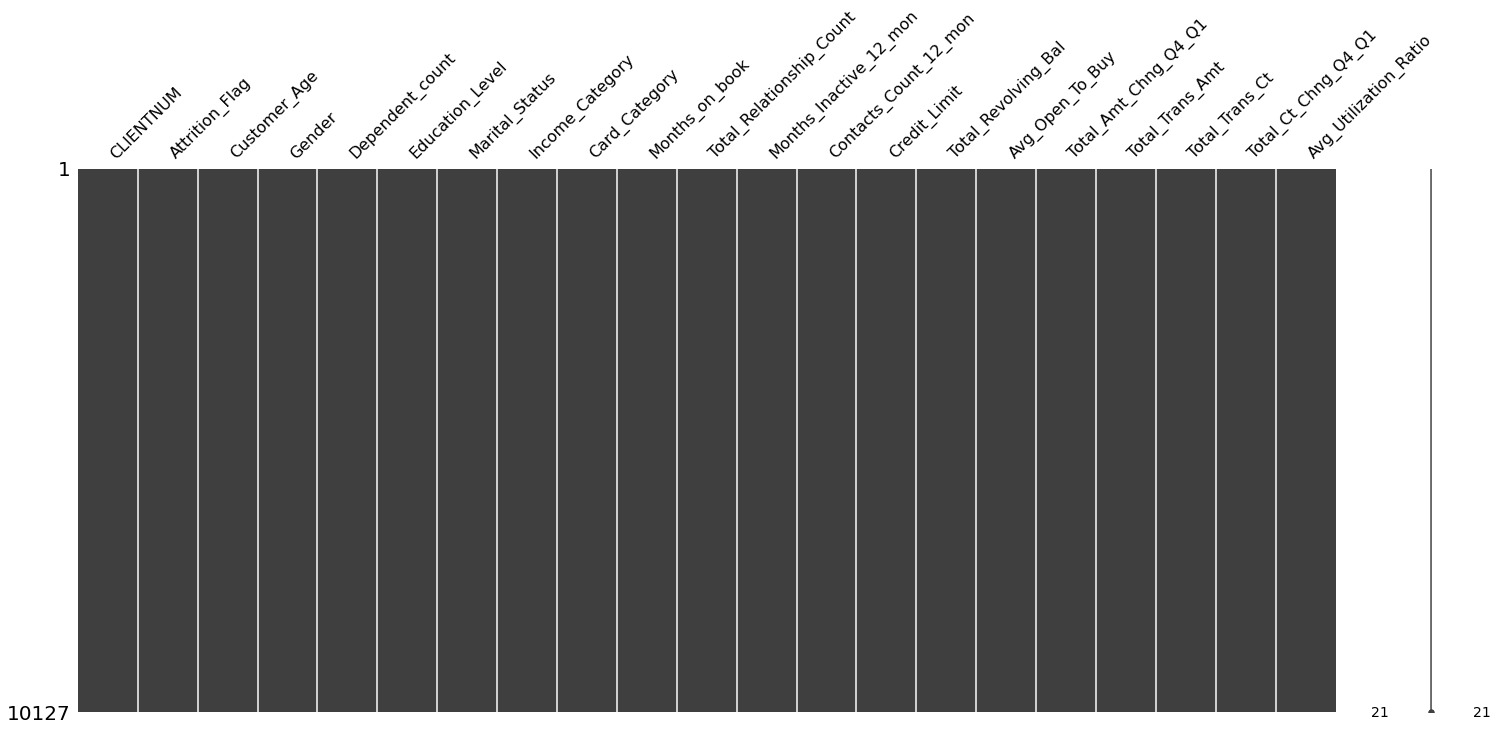

In [12]:
import missingno as mnso 
mnso.matrix(df)

In [13]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

## Comparacion entre clientes 

In [14]:
prom_num=df.groupby(by=['Attrition_Flag']).mean()
prom_num=prom_num.drop(['CLIENTNUM'], axis=1)
prom_num


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,,,
Attrited Customer,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
Existing Customer,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412


In [15]:
contar_cat = df.groupby(by=['Attrition_Flag'])[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']].apply(lambda x: x.apply(pd.Series.value_counts, dropna=True)).T
contar_cat

Attrition_Flag  Attrited Customer                                       \
                          $120K + $40K - $60K $60K - $80K $80K - $120K   
Gender                        NaN         NaN         NaN          NaN   
Education_Level               NaN         NaN         NaN          NaN   
Marital_Status                NaN         NaN         NaN          NaN   
Income_Category             126.0       271.0       189.0        242.0   
Card_Category                 NaN         NaN         NaN          NaN   

Attrition_Flag                                                   ...  \
                   Blue College Divorced Doctorate      F  Gold  ...   
Gender              NaN     NaN      NaN       NaN  930.0   NaN  ...   
Education_Level     NaN   154.0      NaN      95.0    NaN   NaN  ...   
Marital_Status      NaN     NaN    121.0       NaN    NaN   NaN  ...   
Income_Category     NaN     NaN      NaN       NaN    NaN   NaN  ...   
Card_Category    1519.0     NaN      NaN       NaN    NaN  21.0  ...   

Attrition_Flag  Existing Customer                                          \
                      High School Less than $40K       M Married Platinum   
Gender                        NaN            NaN  4072.0     NaN      NaN   
Education_Level            1707.0            NaN     NaN     NaN      NaN   
Marital_Status                NaN            NaN     NaN  3978.0      NaN   
Income_Category               NaN         2949.0     NaN     NaN      NaN   
Card_Category                 NaN            NaN     NaN     NaN     15.0   

Attrition_Flag                                                   
                Post-Graduate Silver  Single Uneducated Unknown  
Gender                    NaN    NaN     NaN        NaN     NaN  
Education_Level         424.0    NaN     NaN     1250.0  1263.0  
Marital_Status            NaN    NaN  3275.0        NaN   620.0  
Income_Category           NaN    NaN     NaN        NaN   925.0  
Card_Category             NaN  473.0     NaN        NaN     NaN  

[5 rows x 42 columns]

# Analisis exploratorio de datos (EDA)

## Analisis univariado

### Variables Categoricas

In [16]:
categ_columns=[]
for col in df.columns:
    if df[col].nunique()<8 and col!='Attrition_Flag' and df[col].dtypes=='object':
        categ_columns.append(col)
print('Las columnas categoricas son{}'.format(categ_columns))

Las columnas categoricas son['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


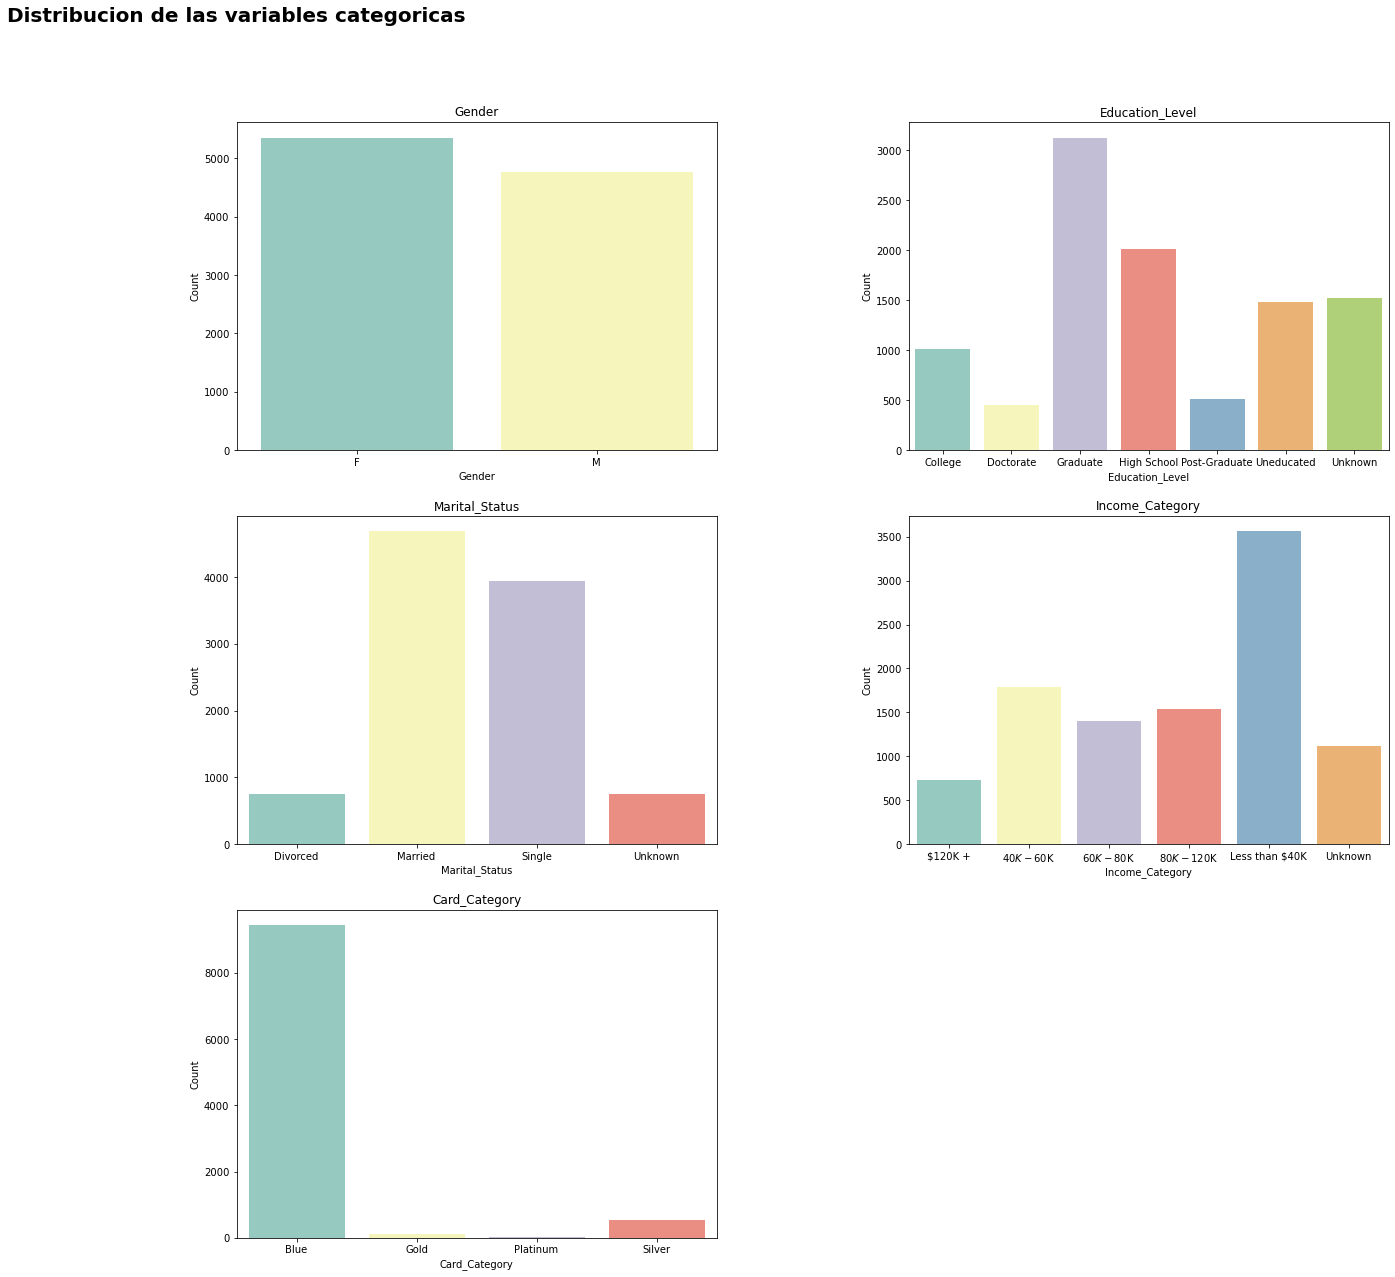

In [17]:
fig=plt.figure(figsize=[40,20])
fig.suptitle('Distribucion de las variables categoricas', fontsize=20,fontweight='bold')
fig.subplots_adjust(top=0.9);
fig.subplots_adjust(0.5,wspace=0.4);
for x, columns in enumerate(categ_columns):
    input=np.unique(df[columns].astype(str),return_counts=True)
    col='input'
    ax1=fig.add_subplot(3,2,x+1);
    ax1=sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')),palette = "Set3")
    
    ax1.set_title(f'{columns}')
    ax1.set_xlabel(f'{columns}')
    ax1.set_ylabel('Count')

Como podemos apreciar existen variable cuyas clases estan equilibradas como podria ser el genero y existen variables que estan muy desequilibradas como la categoria de las tarjetas de credito. Por lo cual al poseer variables desequilibradas provocaria un posible error en el analisis

### Variables numericas

In [18]:
num_columns=[]
for col in df.columns:
    if df[col].nunique()>5 and (df[col].dtypes=='int64' or df[col].dtypes=='float64') and col!='CLIENTNUM':
        num_columns.append(col)
print('Las columnas numericas son{}'.format(num_columns))

Las columnas numericas son['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

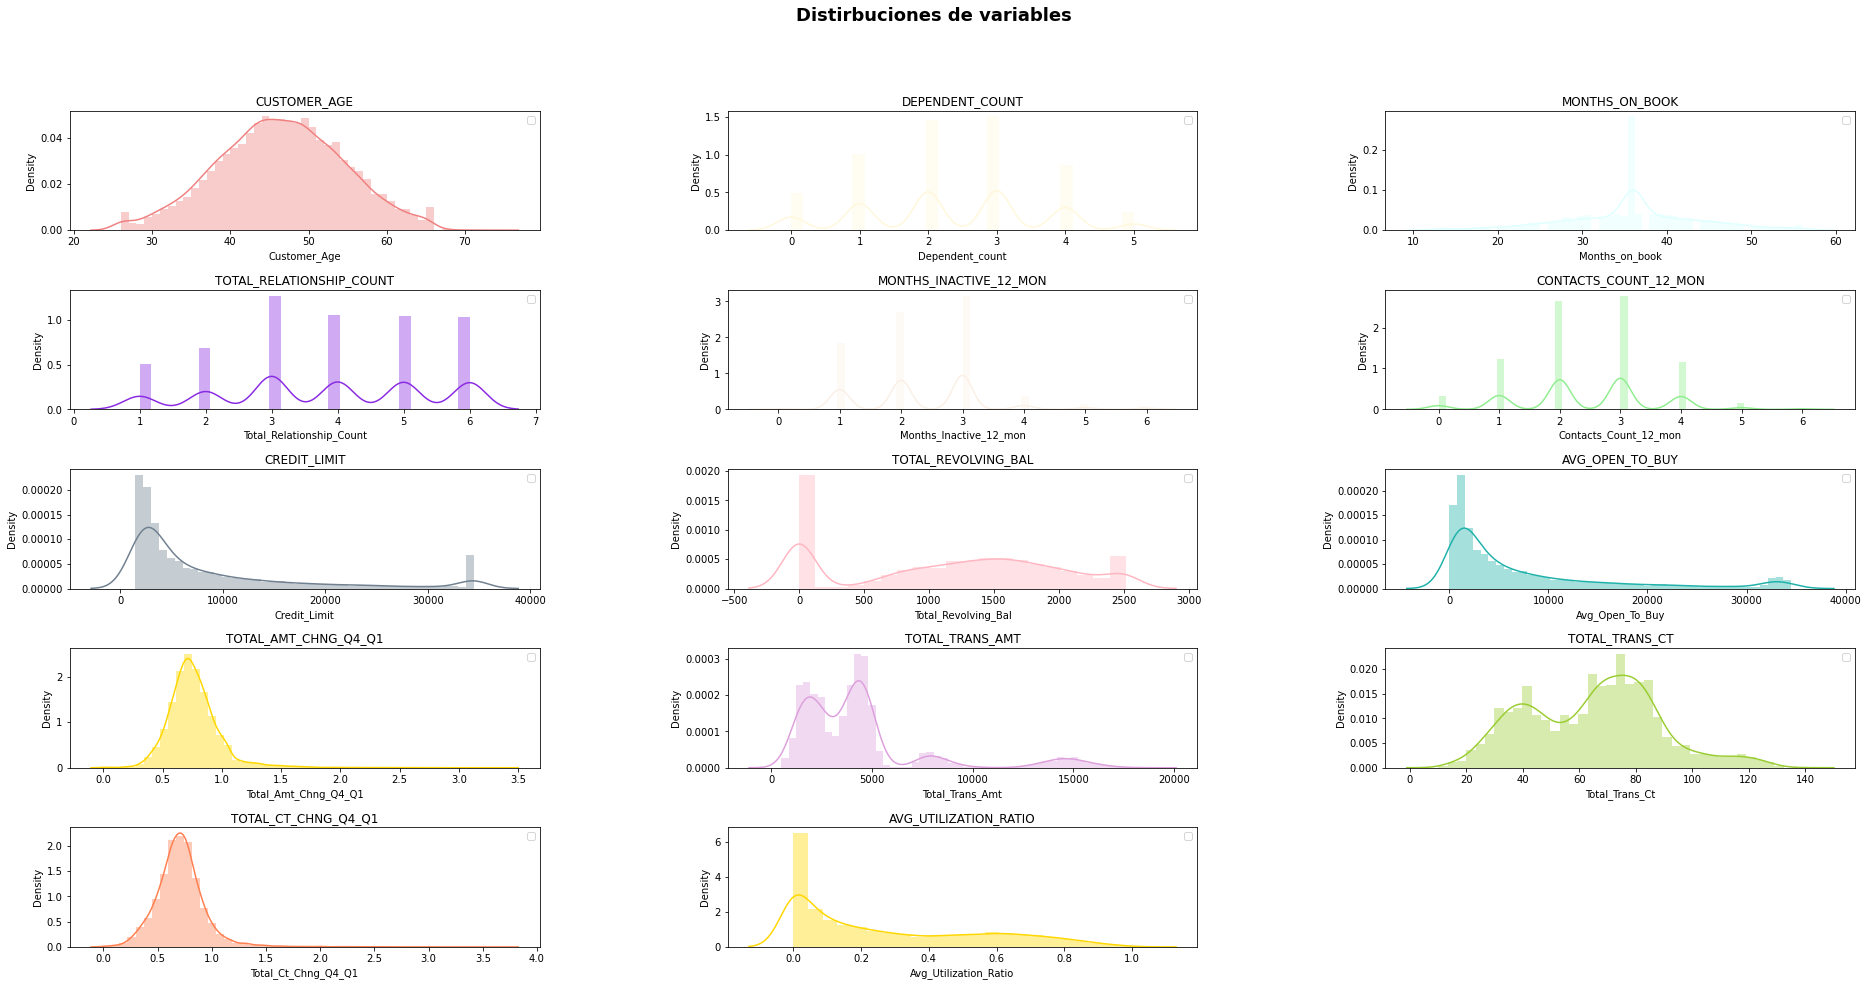

In [19]:
import warnings
warnings.filterwarnings('ignore')
colors_num=['lightcoral','cornsilk','lightcyan','blueviolet','linen','lightgreen','slategray','lightpink','lightseagreen','gold','plum','yellowgreen','coral','gold','dodgerblue','forestgreen','dodgerblue','silver','blue']

fig = plt.figure(figsize=[32,24])
fig.suptitle('Distirbuciones de variables', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(num_columns):
    ax = fig.add_subplot(8, 3, i+1)
    ax = sns.distplot(df[col],  color=colors_num[i]) 
    ax.set_xlabel(f'{col}')
    ax.set_title(f'{col.upper()}')
    ax.legend(fontsize=10) 

Viendo las variables numericas se observan que alguna de ella tienen distribucion normal

## Analisis bivariado

### Variables categoricas

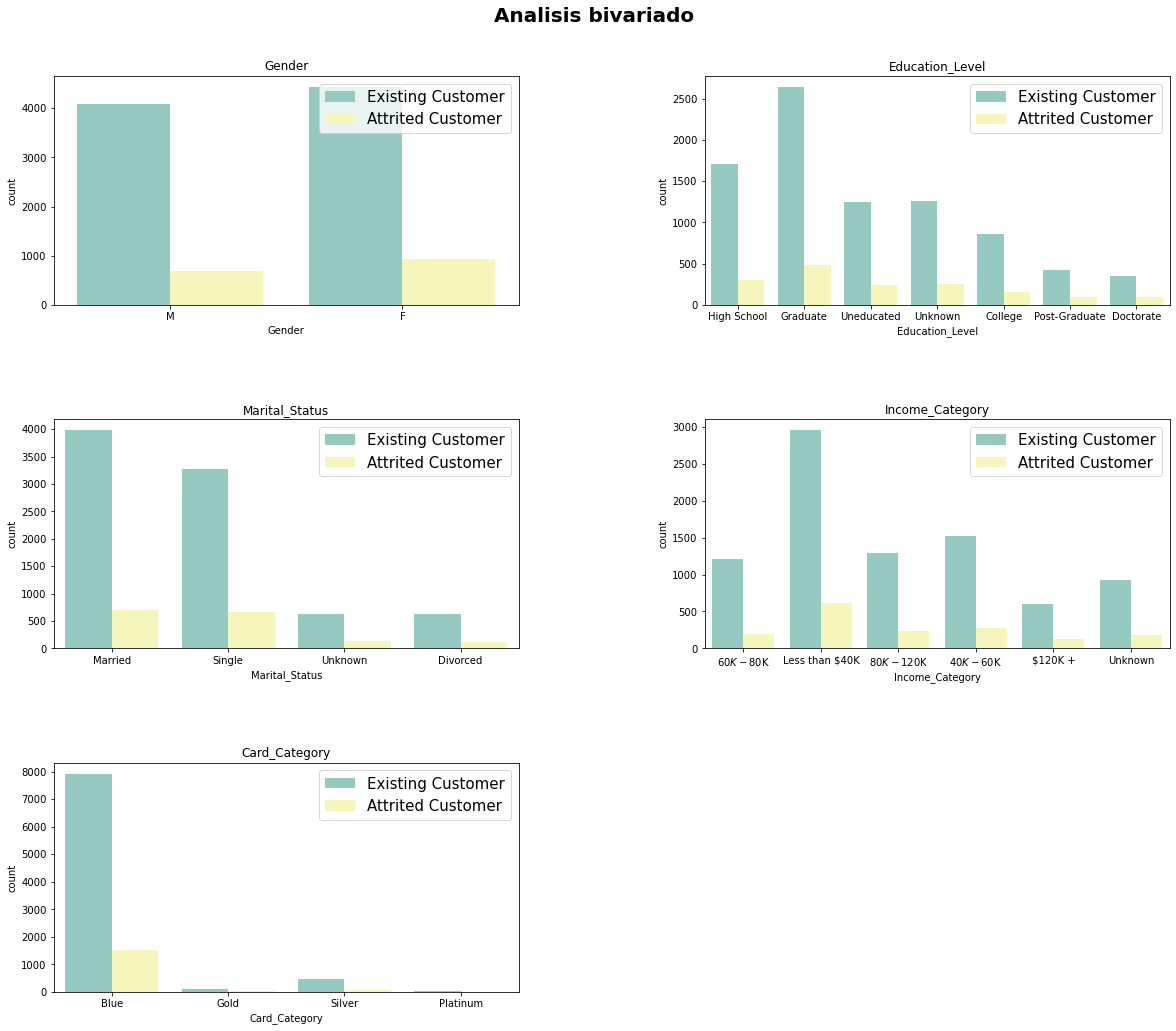

In [20]:
fig=plt.figure(figsize=[20,16])
fig.suptitle('Analisis bivariado', fontsize=20,fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for x, col in enumerate (categ_columns):
    a=fig.add_subplot(3,2,x+1)
    a=sns.countplot(x=df[col], ax=a, hue=df['Attrition_Flag'],palette = "Set3")
    a.set_title(col)
    a.legend(fontsize=15)

Esta distribucion ocurre porque la gran mayoria de los sujetos de la muestra son clientes activos siendo muy bajo el porcentaje de clientes que decidieron dejar de usar el servicio crediticio. A primera vista visualizamos que en general se mantiene en casi todas las categorias una relacion similar de clientes existentes y clientes que abandonaron el uso de la tarjeta de credito, lo cual implicaria que ninguna variable categorica tiene un impacto significativo en nuestra variable objetivo

### Variables numericas

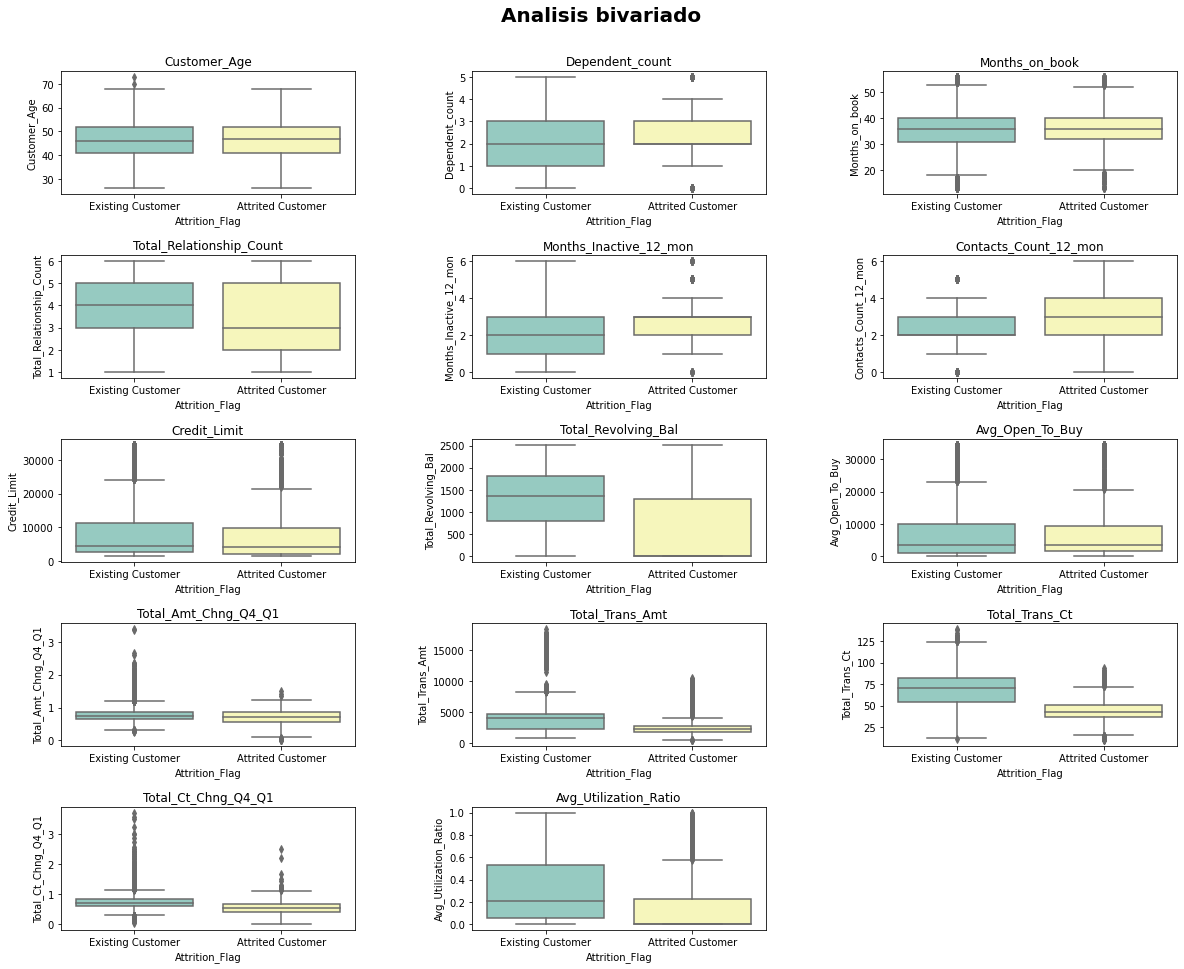

In [21]:
fig=plt.figure(figsize=[20,15])
fig.suptitle('Analisis bivariado',fontsize=20, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for x, col in enumerate(num_columns):
    a=fig.add_subplot(5,3,x+1)
    a=sns.boxplot(x='Attrition_Flag',y=col, ax=a, data=df, palette = "Set3")
    a.set_title(col)

Notamos que existen variables numericas en donde no parece existir una diferencia significativa entre los cliente actuales y los clientes que dejaron de usar el servicio (como por ejemplo edad, periodo de relacion con el banco, entre otros) y por otro lado en donde esta diferencia es mas acentuada (como por ejemplo meses de inactividad, ratio de utilizacion de la tarjeta, importe total de transaccion, entre otros). Teniendo en cuentas las anteriores consideraciones se puede concluir de forma prematura que las variables que tienen diferencia acentuada son más determinantes a la hora de que un cliente permanezca usando el servicio

## Segmentacion de variables

In [22]:
x1=df[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]
x2=df[['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
y=df['Attrition_Flag']

In [23]:
x1

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,Unknown,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...
10122,M,Graduate,Single,$40K - $60K,Blue
10123,M,Unknown,Divorced,$40K - $60K,Blue
10124,F,High School,Married,Less than $40K,Blue
10125,M,Graduate,Unknown,$40K - $60K,Blue


In [24]:
x2

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [25]:
y

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object

In [26]:
# Transformar las variables categoricas a numericas para el analisis de los modelos 
df2=df.copy()
df2

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [27]:
df2['Genero'] = ['0' if x=='F'
                             else '1'
                            for x in df['Gender']]

In [28]:
df2['Nivel_educacion'] = ['0' if x=='Graduate '
                             else '1' if x=='High School'
                             else '2' if x=='Unknown'
                             else '3' if x=='Uneducated'
                             else '4' if x=='College' 
                             else '5' if x=='Post-Graduate '
                             else '6'
                            for x in df['Education_Level']]

In [29]:
df2['Estado_civil'] = ['0' if x =='Married'
                             else '1' if x=='Single'
                             else '2' if x=='Unknown'
                             else '3'
                            for x in df['Marital_Status']]

In [30]:
df2['Ingresos'] = ['0' if x=='Less than $40K'
                             else '1' if x=='$40K - $60K '
                             else '2' if x=='$80K - $120K'
                             else '3' if x=='$60K - $80K'
                             else '4' if x=='Unknown' 
                             else '5'
                            for x in df['Income_Category']]

In [31]:
df2['Tarjeta_de_credito'] = ['0' if x == 'Blue'
                             else '1' if x=='Silver'
                             else '2' if x=='Gold '
                             else '3'
                            for x in df['Card_Category']]


In [32]:
df2

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Genero,Nivel_educacion,Estado_civil,Ingresos,Tarjeta_de_credito
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1.335,1144,42,1.625,0.061,1,1,0,3,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1.541,1291,33,3.714,0.105,0,6,1,0,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,2.594,1887,20,2.333,0.000,1,6,0,2,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1.405,1171,20,2.333,0.760,0,1,2,0,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,2.175,816,28,2.500,0.000,1,3,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,0.703,15476,117,0.857,0.462,1,6,1,5,0
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,0.804,8764,69,0.683,0.511,1,2,3,5,0
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,0.819,10291,60,0.818,0.000,0,1,0,0,0
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0.535,8395,62,0.722,0.000,1,6,2,5,0


In [33]:
x3=df2[['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio','Genero','Nivel_educacion','Estado_civil','Ingresos','Tarjeta_de_credito']]
x3

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Genero,Nivel_educacion,Estado_civil,Ingresos,Tarjeta_de_credito
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,1,0,3,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,6,1,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,6,0,2,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,1,2,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,3,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,1,6,1,5,0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1,2,3,5,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0,1,0,0,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1,6,2,5,0


In [34]:
df2['Estado_cliente'] = ['0' if x=='Existing Customer'
                             else '1'
                            for x in df['Attrition_Flag']]
df2

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Genero,Nivel_educacion,Estado_civil,Ingresos,Tarjeta_de_credito,Estado_cliente
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1144,42,1.625,0.061,1,1,0,3,0,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1291,33,3.714,0.105,0,6,1,0,0,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1887,20,2.333,0.000,1,6,0,2,0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1171,20,2.333,0.760,0,1,2,0,0,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,816,28,2.500,0.000,1,3,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,15476,117,0.857,0.462,1,6,1,5,0,0
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,8764,69,0.683,0.511,1,2,3,5,0,1
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,10291,60,0.818,0.000,0,1,0,0,0,1
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,8395,62,0.722,0.000,1,6,2,5,0,1


In [35]:
df2.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Genero                       object
Nivel_educacion              object
Estado_civil                 object
Ingresos                     object
Tarjeta_de_credito           object
Estado_cliente               object
dtype: object

In [36]:
for col in ['Genero','Nivel_educacion','Estado_civil','Ingresos','Tarjeta_de_credito','Estado_cliente']:
    df2[col]=df2[col].astype(int)

In [37]:
y2=df2['Estado_cliente']
y2

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Estado_cliente, Length: 10127, dtype: int32

# Outlier

In [38]:
x3.dtypes

Customer_Age                  int64
Dependent_count               int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Genero                       object
Nivel_educacion              object
Estado_civil                 object
Ingresos                     object
Tarjeta_de_credito           object
dtype: object

In [39]:
q1=x2.quantile(0.25)
q3=x2.quantile(0.75)
xr=x2.copy()
iqr=q3-q1
limite_superior=q3+1.5*iqr
limite_inferior=q1-1.5*iqr
xr['outlier_iqr'] = x2.apply(lambda row: 1 if any(np.abs(row) > limite_superior) or any(np.abs(row) < limite_inferior) else 0, axis=1)
xr['outlier_iqr'].value_counts()

0    6801
1    3326
Name: outlier_iqr, dtype: int64

In [40]:
index=xr[~((xr['outlier_iqr']==1))].index

In [41]:
x_n= x3.iloc[index]
y_n= y2.iloc[index]

# Forward selection

In [42]:
!pip install mlxtend 
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

# K-mean

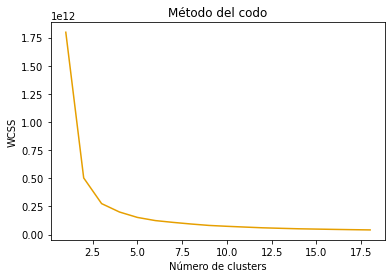

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 19):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 19), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [45]:
sfs.fit(x_n, y_n)
sfs.k_feature_names_ 

('Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Total_Revolving_Bal',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1')

Dichas combinacion de variables mas significativas son diferentes a los plateados en la hipotesis inicial por lo cual se rechaza la hipotesis plateada. Y tambien demuestra que el numero ideal de cluster es 5 aproximadamente

In [46]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=2,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [47]:
sfs.fit(x_n, y_n)
sfs.k_feature_names_ 

('Total_Revolving_Bal', 'Total_Trans_Ct')

Armaremos los cluster teniendo en cuentas las dos variables más significativas

In [48]:
df2['Attrition_Flag'] = df2['Attrition_Flag'].astype('category')

In [49]:
def knn_comparison (data,k):
    x = df2[['Total_Revolving_Bal','Total_Trans_Ct']].values
    y = df2['Estado_cliente'].values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x,y)
    plot_decision_regions(x,y,clf=clf,legend=2)
    plt.xlabel('Total_Revolving_Bal')
    plt.ylabel('Total_Trans_Ct')
    plt.title('Knn with K='+str(k))
    plt.show()

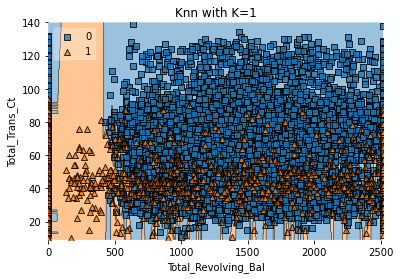

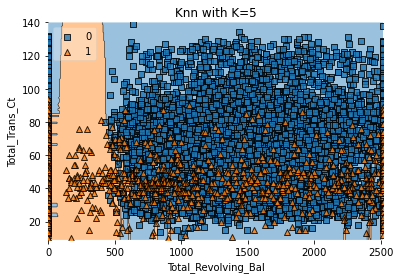

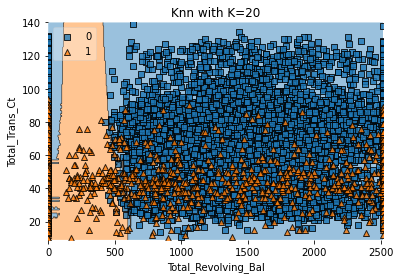

In [50]:
data1 = pd.read_csv(r'C:\Users\Usuario\OneDrive\Escritorio\CODERHOUSE\DATA SCIENSE\BankChurners.csv')
for i in [1,5,20]: 
    knn_comparison(data1, i)

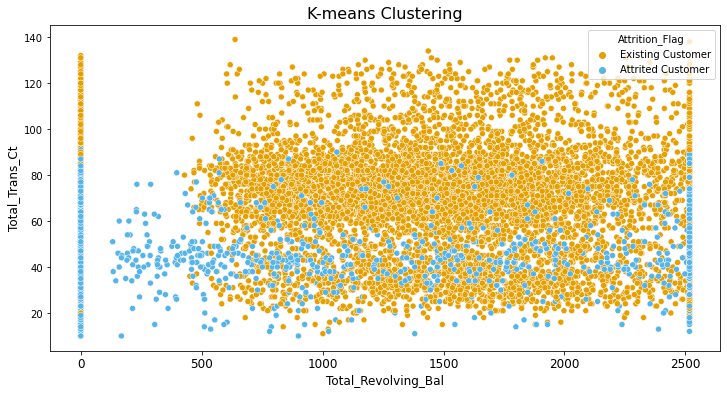

<Figure size 432x288 with 0 Axes>

In [77]:
plt.figure(figsize=(12,6))
sns.scatterplot(df2['Total_Revolving_Bal'],df2['Total_Trans_Ct'],hue=y)
plt.xlabel('Total_Revolving_Bal', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Total_Trans_Ct', fontsize=12)
plt.title('K-means Clustering', fontsize=16)
plt.show()
plt.savefig('k_means.png')

Como se puede observar en la comparacion de Total_Revolving_Bal (Saldo rotatorio total en la tarjeta de crédito) y Total_Trans_Ct (Recuento total de transacciones (últimos 12 meses)) la diferencia más notoria entre clientes existentes y clientes que decidieron dar de baja el servicio crediticio, es que los que decidieron dar de baja el servicio crediticio por lo general tienen un total de transcacciones menor en comparacion de los que aun se encuentran vigentes. La variable de saldo rotatorio no parece ser afectada por la permanencia o no de las personas dentro del servicio. 
Por otro lado tambien observamos que existen clientes que se fueron del servicio con una mayor cantidad de transacciones que la gente que permanece.
Sin embargo hay que tener en consideracion que el porcentaje de clientes que permanece (84%) es muy superior a los clientes que abandonaron (16%), pudiendo existir desbalanceo de clases

# Regresion

In [52]:
model = 'Estado_cliente~Total_Relationship_Count+Months_Inactive_12_mon+Total_Revolving_Bal+Total_Trans_Ct+Total_Ct_Chng_Q4_Q1'
lm = sm.ols(formula=model, data=df2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Estado_cliente   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     928.1
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        21:45:33   Log-Likelihood:                -2313.4
No. Observations:               10127   AIC:                             4639.
Df Residuals:                   10121   BIC:                             4682.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

En principio el R-squared tiene un valor muy bajo (0.314) por lo cual pareciera no ser el método adecuado para representar la muestra. Por lo cual se va a proceder a agregar todas las variables

In [53]:
model = 'Estado_cliente~Customer_Age+Dependent_count+Months_on_book+Total_Relationship_Count+Months_Inactive_12_mon+Contacts_Count_12_mon+Credit_Limit+Total_Revolving_Bal+Avg_Open_To_Buy+Total_Amt_Chng_Q4_Q1+Total_Trans_Amt+Total_Trans_Ct+Total_Ct_Chng_Q4_Q1+Avg_Utilization_Ratio+Genero+Nivel_educacion+Estado_civil+Ingresos+Tarjeta_de_credito' 
lm = sm.ols(formula=model, data=df2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Estado_cliente   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     333.5
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        21:45:33   Log-Likelihood:                -1864.0
No. Observations:               10127   AIC:                             3766.
Df Residuals:                   10108   BIC:                             3903.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Al agregar todas las varibales se observa que el R-squared ahora es de (0.373) habiendo solamente un incremeto de ese valor de 0.059, al ser un incremento poco significativo agregar variables al modelo no contribuyo para poder utilizar el modelo de forma correcta. Por lo cual se decidira utilizar otro modelo 

# Arbol de desicion

In [54]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x3 , y2  ,test_size = 0.20 , random_state = 42)

In [55]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
clf = DecisionTreeClassifier(random_state=1234,criterion='gini',max_depth=3)
model = clf.fit(x_train, y_train)

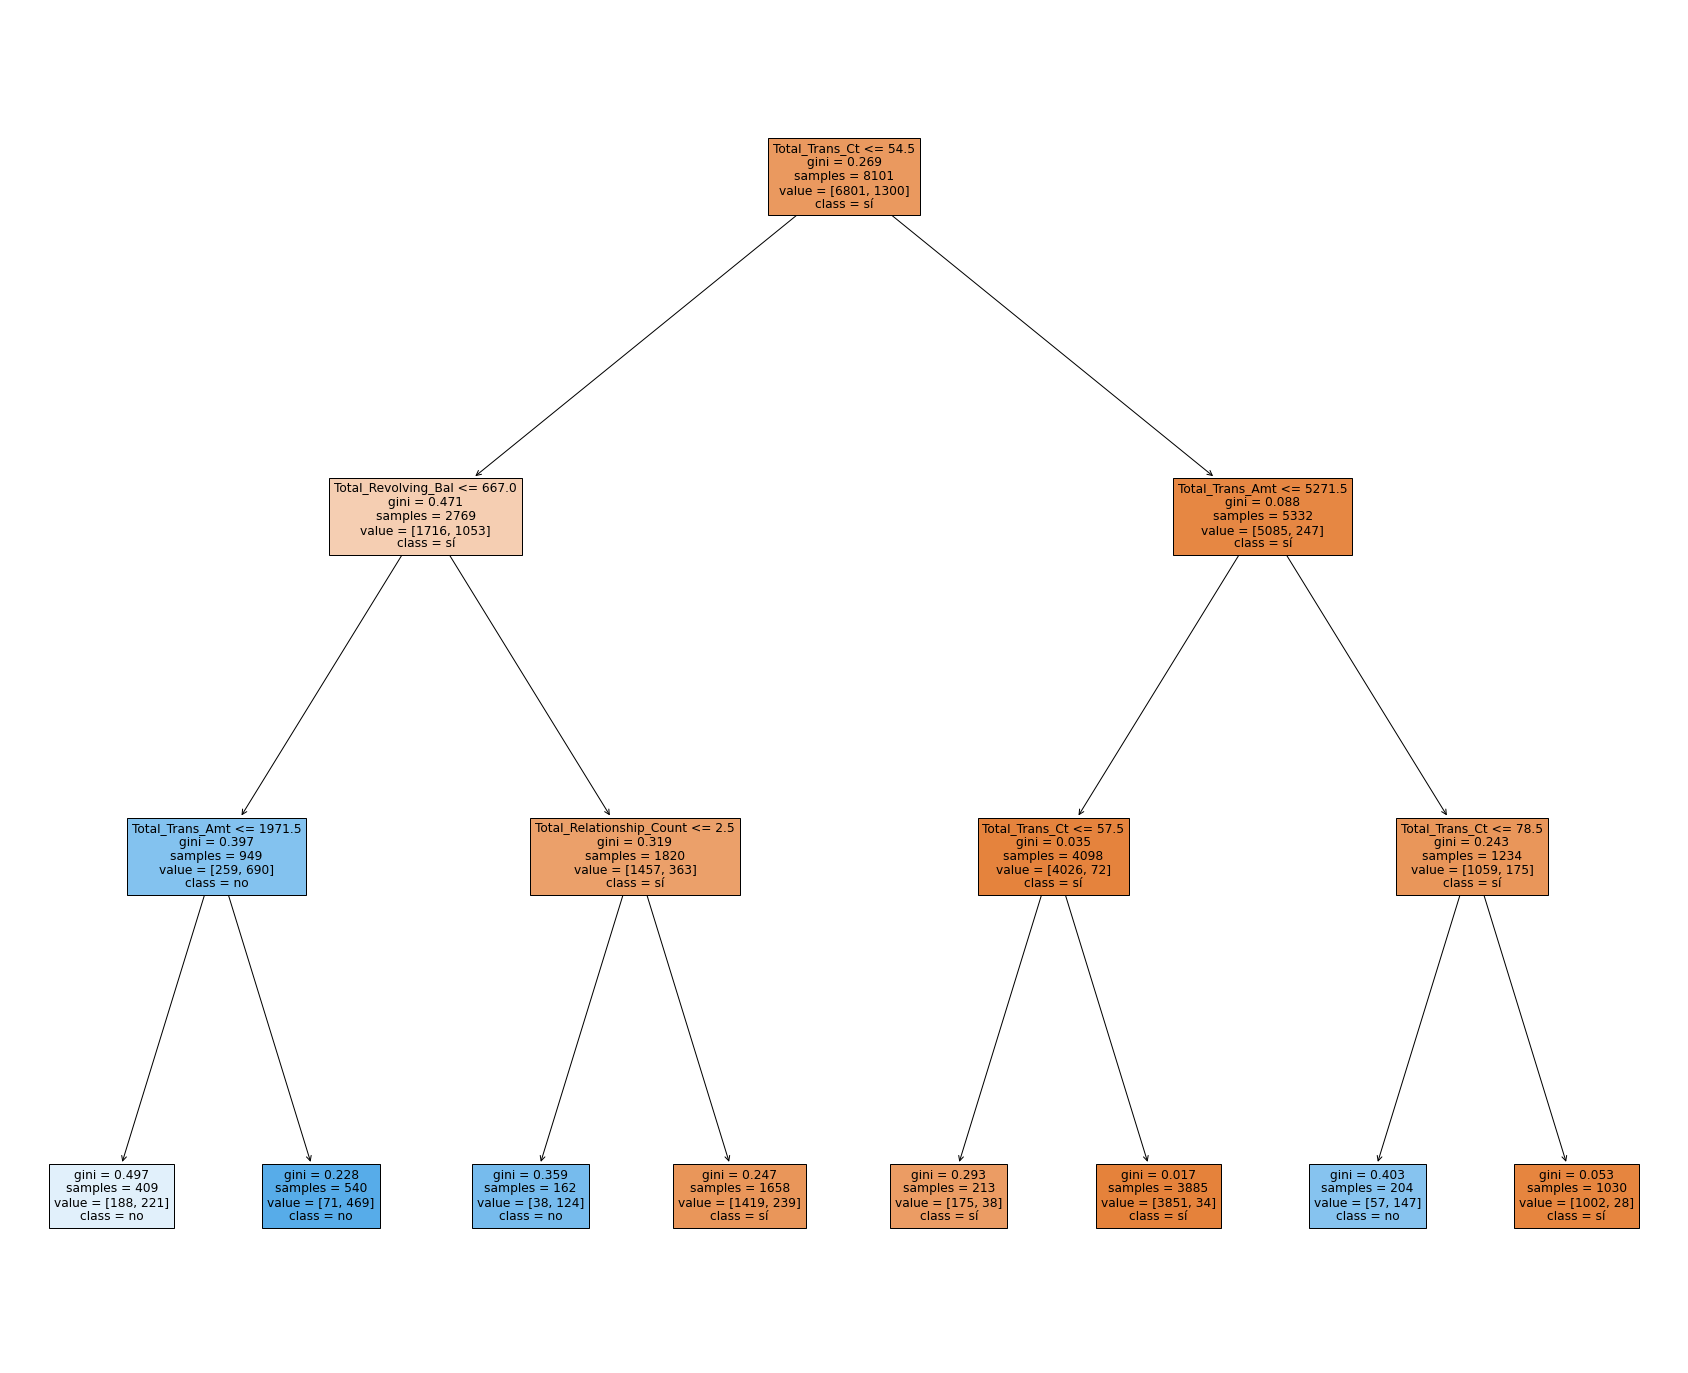

In [56]:
fig = plt.subplots(figsize=(30, 25))
class_names = ["sí", "no"]
_ = tree.plot_tree(clf,feature_names=x_train.columns,filled=True, class_names=class_names)
plt.savefig("decision_tree_new.png", bbox_inches='tight')


Teniendo en cuenta un arbol de decision con una profundidad de 3 vizualizamos que los que tengan un Recuento total de transacciones (últimos 12 meses) inferior o igual a 54.5, que tenga un Saldo rotatorio total en la tarjeta de crédito inferior a 613.5 y Cambio en el recuento de transacciones (Q4 sobre Q1) igual o menor a 0.662 abandonaran el servicio. 
Es importante tener en cuenta que puede ser que la profundidad seleccionada para realizar el grafico sea insuficiente para llegar a conclusiones más acertadas

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [58]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo KNN:", accuracy)

Precisión del modelo KNN: 0.8894373149062191


## Metricas del modelo de clasificacion

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x3,y2,test_size=0.2,random_state=1)
modelo=RandomForestClassifier(random_state=1)
modelo = RandomForestClassifier(random_state=42)
modelo.fit(x_train,y_train)
pred=modelo.predict(x_test)

In [60]:
pred

array([0, 0, 0, ..., 0, 0, 0])

<Figure size 720x432 with 0 Axes>

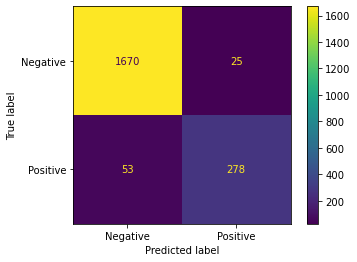

In [61]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo, x_test, y_test, display_labels=['Negative', 'Positive'])

In [62]:
accuracy = metrics.accuracy_score(y_test, pred)
accuracy 

0.9615004935834156

In [63]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1695
           1       0.92      0.84      0.88       331

    accuracy                           0.96      2026
   macro avg       0.94      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026



Como se puede observar es factible utilizar el método de clasificacion porque tiene una precision significativa y usar el arbol de decision ayuda a simplificar el modelo. Por un lado se observa que la gran mayoria de las personas estan actualmente activas siendo la posibilidad de equivocarse relativamente baja, sin embargo al estar la muestra desequilibrada tiene una probabilidad muy alta de confundirse con relacion a que la persona deje de usar el servicio crediticio siendo mayor que los casos reales.
Cuando la persona se encuentra actualmente activa (0) el modelo tiene una alta precision (0.97) y un alto recall(0.99) por lo que el modelo maneja perfectamente esta clase. Al mismo tiempo los que se fueron del beneficio crediticio(1) tiene alta precision(0.92) y bajo recall (0.84) por lo que el modelo no logra clasificar la clase correctamente

# Google Trend

In [64]:
!pip install pytrends

In [65]:
import json

import pandas as pd
import requests

from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
from requests import status_codes

from pytrends import exceptions

from urllib.parse import quote

BASE_TRENDS_URL = 'https://trends.google.com/trends'


class TrendReq(object):
    """
    Google Trends API
    """
    GET_METHOD = 'get'
    POST_METHOD = 'post'
    GENERAL_URL = f'{BASE_TRENDS_URL}/api/explore'
    INTEREST_OVER_TIME_URL = f'{BASE_TRENDS_URL}/api/widgetdata/multiline'
    MULTIRANGE_INTEREST_OVER_TIME_URL = f'{BASE_TRENDS_URL}/api/widgetdata/multirange'
    INTEREST_BY_REGION_URL = f'{BASE_TRENDS_URL}/api/widgetdata/comparedgeo'
    RELATED_QUERIES_URL = f'{BASE_TRENDS_URL}/api/widgetdata/relatedsearches'
    TRENDING_SEARCHES_URL = f'{BASE_TRENDS_URL}/hottrends/visualize/internal/data'
    TOP_CHARTS_URL = f'{BASE_TRENDS_URL}/api/topcharts'
    SUGGESTIONS_URL = f'{BASE_TRENDS_URL}/api/autocomplete/'
    CATEGORIES_URL = f'{BASE_TRENDS_URL}/api/explore/pickers/category'
    TODAY_SEARCHES_URL = f'{BASE_TRENDS_URL}/api/dailytrends'
    REALTIME_TRENDING_SEARCHES_URL = f'{BASE_TRENDS_URL}/api/realtimetrends'
    ERROR_CODES = (500, 502, 504, 429)

    def __init__(self, hl='en-US', tz=360, geo='', timeout=(2, 5), proxies='',
                 retries=0, backoff_factor=0, requests_args=None):
        """
        Initialize default values for params
        """
        # google rate limit
        self.google_rl = 'You have reached your quota limit. Please try again later.'
        self.results = None
        # set user defined options used globally
        self.tz = tz
        self.hl = hl
        self.geo = geo
        self.kw_list = list()
        self.timeout = timeout
        self.proxies = proxies  # add a proxy option
        self.retries = retries
        self.backoff_factor = backoff_factor
        self.proxy_index = 0
        self.requests_args = requests_args or {}
        self.cookies = self.GetGoogleCookie()
        # intialize widget payloads
        self.token_payload = dict()
        self.interest_over_time_widget = dict()
        self.interest_by_region_widget = dict()
        self.related_topics_widget_list = list()
        self.related_queries_widget_list = list()

        self.headers = {'accept-language': self.hl}
        self.headers.update(self.requests_args.pop('headers', {}))
        
    def GetGoogleCookie(self):
        """
        Gets google cookie (used for each and every proxy; once on init otherwise)
        Removes proxy from the list on proxy error
        """
        while True:
            if "proxies" in self.requests_args:
                try:
                    return dict(filter(lambda i: i[0] == 'NID', requests.post(
                        f'{BASE_TRENDS_URL}/?geo={self.hl[-2:]}',
                        timeout=self.timeout,
                        **self.requests_args
                    ).cookies.items()))
                except:
                    continue
            else:
                if len(self.proxies) > 0:
                    proxy = {'https': self.proxies[self.proxy_index]}
                else:
                    proxy = ''
                try:
                    return dict(filter(lambda i: i[0] == 'NID', requests.post(
                        f'{BASE_TRENDS_URL}/?geo={self.hl[-2:]}',
                        timeout=self.timeout,
                        proxies=proxy,
                        **self.requests_args
                    ).cookies.items()))
                except requests.exceptions.ProxyError:
                    print('Proxy error. Changing IP')
                    if len(self.proxies) > 1:
                        self.proxies.remove(self.proxies[self.proxy_index])
                    else:
                        print('No more proxies available. Bye!')
                        raise
                    continue

    def GetNewProxy(self):
        """
        Increment proxy INDEX; zero on overflow
        """
        if self.proxy_index < (len(self.proxies) - 1):
            self.proxy_index += 1
        else:
            self.proxy_index = 0

    def _get_data(self, url, method=GET_METHOD, trim_chars=0, **kwargs):
        """Send a request to Google and return the JSON response as a Python object
        :param url: the url to which the request will be sent
        :param method: the HTTP method ('get' or 'post')
        :param trim_chars: how many characters should be trimmed off the beginning of the content of the response
            before this is passed to the JSON parser
        :param kwargs: any extra key arguments passed to the request builder (usually query parameters or data)
        :return:
        """
        s = requests.session()
        # Retries mechanism. Activated when one of statements >0 (best used for proxy)
        if self.retries > 0 or self.backoff_factor > 0:
            retry = Retry(total=self.retries, read=self.retries,
                          connect=self.retries,
                          backoff_factor=self.backoff_factor,
                          status_forcelist=TrendReq.ERROR_CODES,
                          allowed_methods=frozenset(['GET', 'POST']))
            s.mount('https://', HTTPAdapter(max_retries=retry))

        s.headers.update(self.headers)
        if len(self.proxies) > 0:
            self.cookies = self.GetGoogleCookie()
            s.proxies.update({'https': self.proxies[self.proxy_index]})
        if method == TrendReq.POST_METHOD:
            response = s.post(url, timeout=self.timeout,
                              cookies=self.cookies, **kwargs,
                              **self.requests_args)  # DO NOT USE retries or backoff_factor here
        else:
            response = s.get(url, timeout=self.timeout, cookies=self.cookies,
                             **kwargs, **self.requests_args)  # DO NOT USE retries or backoff_factor here
        # check if the response contains json and throw an exception otherwise
        # Google mostly sends 'application/json' in the Content-Type header,
        # but occasionally it sends 'application/javascript
        # and sometimes even 'text/javascript
        if response.status_code == 200 and 'application/json' in \
                response.headers['Content-Type'] or \
                'application/javascript' in response.headers['Content-Type'] or \
                'text/javascript' in response.headers['Content-Type']:
            # trim initial characters
            # some responses start with garbage characters, like ")]}',"
            # these have to be cleaned before being passed to the json parser
            content = response.text[trim_chars:]
            # parse json
            self.GetNewProxy()
            return json.loads(content)
        else:
            if response.status_code == status_codes.codes.too_many_requests:
                raise exceptions.TooManyRequestsError.from_response(response)
            raise exceptions.ResponseError.from_response(response)

    def build_payload(self, kw_list, cat=0, timeframe='today 5-y', geo='',
                      gprop=''):
        """Create the payload for related queries, interest over time and interest by region"""
        if gprop not in ['', 'images', 'news', 'youtube', 'froogle']:
            raise ValueError('gprop must be empty (to indicate web), images, news, youtube, or froogle')
        self.kw_list = kw_list
        self.geo = geo or self.geo
        self.token_payload = {
            'hl': self.hl,
            'tz': self.tz,
            'req': {'comparisonItem': [], 'category': cat, 'property': gprop}
        }

        # Check if timeframe is a list
        if isinstance(timeframe, list):
            for index, kw in enumerate(self.kw_list):
                keyword_payload = {'keyword': kw, 'time': timeframe[index], 'geo': self.geo}
                self.token_payload['req']['comparisonItem'].append(keyword_payload)
        else: 
            # build out json for each keyword with
            for kw in self.kw_list:
                keyword_payload = {'keyword': kw, 'time': timeframe, 'geo': self.geo}
                self.token_payload['req']['comparisonItem'].append(keyword_payload)

        # requests will mangle this if it is not a string
        self.token_payload['req'] = json.dumps(self.token_payload['req'])
        # get tokens
        self._tokens()
        return

    def _tokens(self):
        """Makes request to Google to get API tokens for interest over time, interest by region and related queries"""
        # make the request and parse the returned json
        widget_dicts = self._get_data(
            url=TrendReq.GENERAL_URL,
            method=TrendReq.GET_METHOD,
            params=self.token_payload,
            trim_chars=4,
        )['widgets']
        # order of the json matters...
        first_region_token = True
        # clear self.related_queries_widget_list and self.related_topics_widget_list
        # of old keywords'widgets
        self.related_queries_widget_list[:] = []
        self.related_topics_widget_list[:] = []
        # assign requests
        for widget in widget_dicts:
            if widget['id'] == 'TIMESERIES':
                self.interest_over_time_widget = widget
            if widget['id'] == 'GEO_MAP' and first_region_token:
                self.interest_by_region_widget = widget
                first_region_token = False
            # response for each term, put into a list
            if 'RELATED_TOPICS' in widget['id']:
                self.related_topics_widget_list.append(widget)
            if 'RELATED_QUERIES' in widget['id']:
                self.related_queries_widget_list.append(widget)
        return

    def interest_over_time(self):
        """Request data from Google's Interest Over Time section and return a dataframe"""

        over_time_payload = {
            # convert to string as requests will mangle
            'req': json.dumps(self.interest_over_time_widget['request']),
            'token': self.interest_over_time_widget['token'],
            'tz': self.tz
        }

        # make the request and parse the returned json
        req_json = self._get_data(
            url=TrendReq.INTEREST_OVER_TIME_URL,
            method=TrendReq.GET_METHOD,
            trim_chars=5,
            params=over_time_payload,
        )

        df = pd.DataFrame(req_json['default']['timelineData'])
        if (df.empty):
            return df

        df['date'] = pd.to_datetime(df['time'].astype(dtype='float64'),
                                    unit='s')
        df = df.set_index(['date']).sort_index()
        # split list columns into seperate ones, remove brackets and split on comma
        result_df = df['value'].apply(lambda x: pd.Series(
            str(x).replace('[', '').replace(']', '').split(',')))
        # rename each column with its search term, relying on order that google provides...
        for idx, kw in enumerate(self.kw_list):
            # there is currently a bug with assigning columns that may be
            # parsed as a date in pandas: use explicit insert column method
            result_df.insert(len(result_df.columns), kw,
                             result_df[idx].astype('int'))
            del result_df[idx]

        if 'isPartial' in df:
            # make other dataframe from isPartial key data
            # split list columns into seperate ones, remove brackets and split on comma
            df = df.fillna(False)
            result_df2 = df['isPartial'].apply(lambda x: pd.Series(
                str(x).replace('[', '').replace(']', '').split(',')))
            result_df2.columns = ['isPartial']
            # Change to a bool type.
            result_df2.isPartial = result_df2.isPartial == 'True'
            # concatenate the two dataframes
            final = pd.concat([result_df, result_df2], axis=1)
        else:
            final = result_df
            final['isPartial'] = False

        return final

    def multirange_interest_over_time(self):
        """Request data from Google's Interest Over Time section across different time ranges and return a dataframe"""

        over_time_payload = {
            # convert to string as requests will mangle
            'req': json.dumps(self.interest_over_time_widget['request']),
            'token': self.interest_over_time_widget['token'],
            'tz': self.tz
        }

        # make the request and parse the returned json
        req_json = self._get_data(
            url=TrendReq.MULTIRANGE_INTEREST_OVER_TIME_URL,
            method=TrendReq.GET_METHOD,
            trim_chars=5,
            params=over_time_payload,
        )

        df = pd.DataFrame(req_json['default']['timelineData'])
        if (df.empty):
            return df

        result_df = pd.json_normalize(df['columnData'])

        # Split dictionary columns into seperate ones
        for i, column in enumerate(result_df.columns):
            result_df["[" + str(i) + "] " + str(self.kw_list[i]) + " date"] = result_df[i].apply(pd.Series)["formattedTime"]
            result_df["[" + str(i) + "] " + str(self.kw_list[i]) + " value"] = result_df[i].apply(pd.Series)["value"]   
            result_df = result_df.drop([i], axis=1)
        
        # Adds a row with the averages at the top of the dataframe
        avg_row = {}
        for i, avg in enumerate(req_json['default']['averages']):
            avg_row["[" + str(i) + "] " + str(self.kw_list[i]) + " date"] = "Average"
            avg_row["[" + str(i) + "] " + str(self.kw_list[i]) + " value"] = req_json['default']['averages'][i]

        result_df.loc[-1] = avg_row
        result_df.index = result_df.index + 1
        result_df = result_df.sort_index()
        
        return result_df


    def interest_by_region(self, resolution='COUNTRY', inc_low_vol=False,
                           inc_geo_code=False):
        """Request data from Google's Interest by Region section and return a dataframe"""

        # make the request
        region_payload = dict()
        if self.geo == '':
            self.interest_by_region_widget['request'][
                'resolution'] = resolution
        elif self.geo == 'US' and resolution in ['DMA', 'CITY', 'REGION']:
            self.interest_by_region_widget['request'][
                'resolution'] = resolution

        self.interest_by_region_widget['request'][
            'includeLowSearchVolumeGeos'] = inc_low_vol

        # convert to string as requests will mangle
        region_payload['req'] = json.dumps(
            self.interest_by_region_widget['request'])
        region_payload['token'] = self.interest_by_region_widget['token']
        region_payload['tz'] = self.tz

        # parse returned json
        req_json = self._get_data(
            url=TrendReq.INTEREST_BY_REGION_URL,
            method=TrendReq.GET_METHOD,
            trim_chars=5,
            params=region_payload,
        )
        df = pd.DataFrame(req_json['default']['geoMapData'])
        if (df.empty):
            return df

        # rename the column with the search keyword
        geo_column = 'geoCode' if 'geoCode' in df.columns else 'coordinates'
        columns = ['geoName', geo_column, 'value']
        df = df[columns].set_index(['geoName']).sort_index()
        # split list columns into separate ones, remove brackets and split on comma
        result_df = df['value'].apply(lambda x: pd.Series(
            str(x).replace('[', '').replace(']', '').split(',')))
        if inc_geo_code:
            if geo_column in df.columns:
                result_df[geo_column] = df[geo_column]
            else:
                print('Could not find geo_code column; Skipping')

        # rename each column with its search term
        for idx, kw in enumerate(self.kw_list):
            result_df[kw] = result_df[idx].astype('int')
            del result_df[idx]

        return result_df

    def related_topics(self):
        """Request data from Google's Related Topics section and return a dictionary of dataframes
        If no top and/or rising related topics are found, the value for the key "top" and/or "rising" will be None
        """

        # make the request
        related_payload = dict()
        result_dict = dict()
        for request_json in self.related_topics_widget_list:
            # ensure we know which keyword we are looking at rather than relying on order
            try:
                kw = request_json['request']['restriction'][
                    'complexKeywordsRestriction']['keyword'][0]['value']
            except KeyError:
                kw = ''
            # convert to string as requests will mangle
            related_payload['req'] = json.dumps(request_json['request'])
            related_payload['token'] = request_json['token']
            related_payload['tz'] = self.tz

            # parse the returned json
            req_json = self._get_data(
                url=TrendReq.RELATED_QUERIES_URL,
                method=TrendReq.GET_METHOD,
                trim_chars=5,
                params=related_payload,
            )

            # top topics
            try:
                top_list = req_json['default']['rankedList'][0]['rankedKeyword']
                df_top = pd.json_normalize(top_list, sep='_')
            except KeyError:
                # in case no top topics are found, the lines above will throw a KeyError
                df_top = None

            # rising topics
            try:
                rising_list = req_json['default']['rankedList'][1]['rankedKeyword']
                df_rising = pd.json_normalize(rising_list, sep='_')
            except KeyError:
                # in case no rising topics are found, the lines above will throw a KeyError
                df_rising = None

            result_dict[kw] = {'rising': df_rising, 'top': df_top}
        return result_dict

    def related_queries(self):
        """Request data from Google's Related Queries section and return a dictionary of dataframes
        If no top and/or rising related queries are found, the value for the key "top" and/or "rising" will be None
        """

        # make the request
        related_payload = dict()
        result_dict = dict()
        for request_json in self.related_queries_widget_list:
            # ensure we know which keyword we are looking at rather than relying on order
            try:
                kw = request_json['request']['restriction'][
                    'complexKeywordsRestriction']['keyword'][0]['value']
            except KeyError:
                kw = ''
            # convert to string as requests will mangle
            related_payload['req'] = json.dumps(request_json['request'])
            related_payload['token'] = request_json['token']
            related_payload['tz'] = self.tz

            # parse the returned json
            req_json = self._get_data(
                url=TrendReq.RELATED_QUERIES_URL,
                method=TrendReq.GET_METHOD,
                trim_chars=5,
                params=related_payload,
            )

            # top queries
            try:
                top_df = pd.DataFrame(
                    req_json['default']['rankedList'][0]['rankedKeyword'])
                top_df = top_df[['query', 'value']]
            except KeyError:
                # in case no top queries are found, the lines above will throw a KeyError
                top_df = None

            # rising queries
            try:
                rising_df = pd.DataFrame(
                    req_json['default']['rankedList'][1]['rankedKeyword'])
                rising_df = rising_df[['query', 'value']]
            except KeyError:
                # in case no rising queries are found, the lines above will throw a KeyError
                rising_df = None

            result_dict[kw] = {'top': top_df, 'rising': rising_df}
        return result_dict

    def trending_searches(self, pn='united_states'):
        """Request data from Google's Hot Searches section and return a dataframe"""

        # make the request
        # forms become obsolete due to the new TRENDING_SEARCHES_URL
        # forms = {'ajax': 1, 'pn': pn, 'htd': '', 'htv': 'l'}
        req_json = self._get_data(
            url=TrendReq.TRENDING_SEARCHES_URL,
            method=TrendReq.GET_METHOD
        )[pn]
        result_df = pd.DataFrame(req_json)
        return result_df

    def today_searches(self, pn='US'):
        """Request data from Google Daily Trends section and returns a dataframe"""
        forms = {'ns': 15, 'geo': pn, 'tz': '-180', 'hl': 'en-US'}
        req_json = self._get_data(
            url=TrendReq.TODAY_SEARCHES_URL,
            method=TrendReq.GET_METHOD,
            trim_chars=5,
            params=forms,
            **self.requests_args
        )['default']['trendingSearchesDays'][0]['trendingSearches']
        # parse the returned json
        result_df = pd.DataFrame(trend['title'] for trend in req_json)
        return result_df.iloc[:, -1]

    def realtime_trending_searches(self, pn='US', cat='all', count =300):
        """Request data from Google Realtime Search Trends section and returns a dataframe"""
        # Don't know what some of the params mean here, followed the nodejs library
        # https://github.com/pat310/google-trends-api/ 's implemenration


        #sort: api accepts only 0 as the value, optional parameter

        # ri: number of trending stories IDs returned,
        # max value of ri supported is 300, based on emperical evidence

        ri_value = 300
        if count < ri_value:
            ri_value = count

        # rs : don't know what is does but it's max value is never more than the ri_value based on emperical evidence
        # max value of ri supported is 200, based on emperical evidence
        rs_value = 200
        if count < rs_value:
            rs_value = count-1

        forms = {'ns': 15, 'geo': pn, 'tz': '300', 'hl': 'en-US', 'cat': cat, 'fi' : '0', 'fs' : '0', 'ri' : ri_value, 'rs' : rs_value, 'sort' : 0}
        req_json = self._get_data(
            url=TrendReq.REALTIME_TRENDING_SEARCHES_URL,
            method=TrendReq.GET_METHOD,
            trim_chars=5,
            params=forms
        )['storySummaries']['trendingStories']

        # parse the returned json
        wanted_keys = ["entityNames", "title"]

        final_json = [{ key: ts[key] for key in ts.keys() if key in wanted_keys} for ts in req_json ]

        result_df = pd.DataFrame(final_json)

        return result_df

    def top_charts(self, date, hl='en-US', tz=300, geo='GLOBAL'):
        """Request data from Google's Top Charts section and return a dataframe"""

        try:
            date = int(date)
        except:
            raise ValueError(
                'The date must be a year with format YYYY. See https://github.com/GeneralMills/pytrends/issues/355')

        # create the payload
        chart_payload = {'hl': hl, 'tz': tz, 'date': date, 'geo': geo,
                         'isMobile': False}

        # make the request and parse the returned json
        req_json = self._get_data(
            url=TrendReq.TOP_CHARTS_URL,
            method=TrendReq.GET_METHOD,
            trim_chars=5,
            params=chart_payload
        )
        try:
            df = pd.DataFrame(req_json['topCharts'][0]['listItems'])
        except IndexError:
            df = None
        return df

    def suggestions(self, keyword):
        """Request data from Google's Keyword Suggestion dropdown and return a dictionary"""

        # make the request
        kw_param = quote(keyword)
        parameters = {'hl': self.hl}

        req_json = self._get_data(
            url=TrendReq.SUGGESTIONS_URL + kw_param,
            params=parameters,
            method=TrendReq.GET_METHOD,
            trim_chars=5
        )['default']['topics']
        return req_json

    def categories(self):
        """Request available categories data from Google's API and return a dictionary"""

        params = {'hl': self.hl}

        req_json = self._get_data(
            url=TrendReq.CATEGORIES_URL,
            params=params,
            method=TrendReq.GET_METHOD,
            trim_chars=5
        )
        return req_json

    def get_historical_interest(self, *args, **kwargs):
        raise NotImplementedError(
            """This method has been removed for incorrectness. It will be removed completely in v5.
If you'd like similar functionality, please try implementing it yourself and consider submitting a pull request to add it to pytrends.
          
There is discussion at:
https://github.com/GeneralMills/pytrends/pull/542"""
        )

In [66]:
!pip show pytrends

Name: pytrends
Version: 4.9.2
Summary: Pseudo API for Google Trends
Home-page: 
Author: John Hogue, Burton DeWilde
Author-email: dreyco676@gmail.com
License: Apache 2.0
Location: c:\users\usuario\anaconda3\lib\site-packages
Requires: lxml, requests, pandas
Required-by: 


In [67]:
dt = TrendReq(hl='es',retries=3, backoff_factor=20)
kw_list = ["Santander","BBVA","Banco Nacion","Galicia"]
dt.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='AR', gprop='')

In [68]:
p=dt.interest_by_region()
p

,Santander,BBVA,Banco Nacion,Galicia
geoName,,,,
Buenos Aires,32,9,27,32
Catamarca,11,3,73,13
Chaco,22,6,53,19
Chubut,28,9,40,23
Ciudad Autónoma de Buenos Aires,31,10,24,35
Corrientes,21,6,51,22
Córdoba,30,7,37,26
Entre Ríos,29,9,43,19
Formosa,6,9,57,28


<AxesSubplot:xlabel='geoName'>

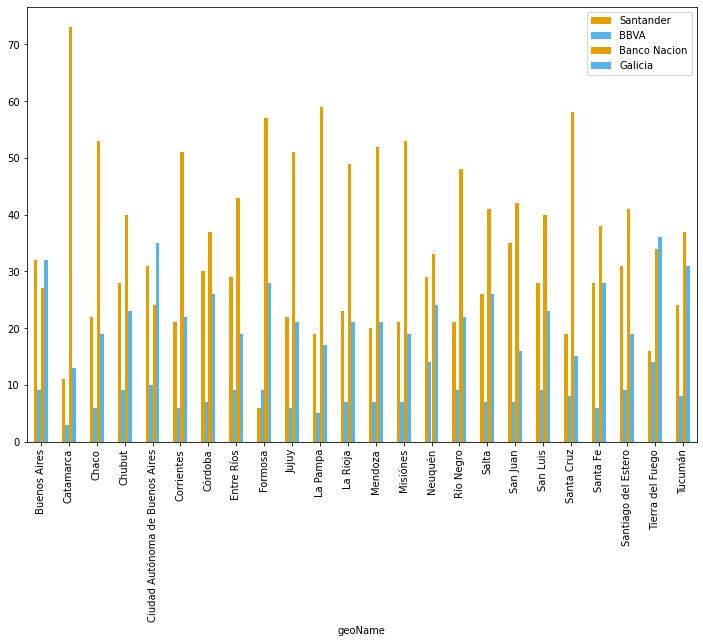

In [69]:
p.plot(kind='bar',figsize=(12,8))

In [70]:
t=dt.interest_over_time()
t

,Santander,BBVA,Banco Nacion,Galicia,isPartial
date,,,,,
2018-05-20,27,4,25,24,False
2018-05-27,35,4,29,33,False
2018-06-03,40,5,33,41,False
2018-06-10,34,4,36,32,False
2018-06-17,29,4,30,28,False
...,...,...,...,...,...
2023-04-09,23,12,25,22,False
2023-04-16,19,11,23,19,False
2023-04-23,20,10,26,21,False


<AxesSubplot:xlabel='date'>

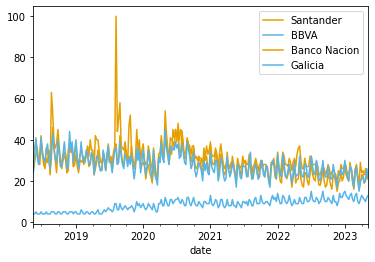

In [71]:
t.plot()

Analizando los dos graficos se puede observar en casi todas las provincias el banco Nacion es el que tiene más busquedas en cada provincia y a lo largo del tiempo. Sin embargo Santander, Banco Nacion y Galicia suelen tener un nivel similar de busquedas mientras que el BBVA tiene un nivel de busquedas muy por debajo.
Un nivel mayor de busquedas implica que la posee una cuenta bancaria en dicho banco o bien estan interesados en poseerla. Es muy probable que aquellas personas que posean una cuenta bancaria tambien posea una tarjeta de credito del banco correspondiente

In [72]:
dt2 = TrendReq(hl='es',retries=3, backoff_factor=20)
kw_list = ["VISA","MASTERCARD","NARANJA","MERCADO PAGO"]
dt2.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='AR', gprop='')

In [73]:
p2=dt2.interest_by_region()
p2

,VISA,MASTERCARD,NARANJA,MERCADO PAGO
geoName,,,,
Buenos Aires,55,4,24,17
Catamarca,12,5,74,9
Chaco,20,3,65,12
Chubut,28,3,53,16
Ciudad Autónoma de Buenos Aires,55,7,19,19
Corrientes,26,2,58,14
Córdoba,20,4,64,12
Entre Ríos,29,5,49,17
Formosa,20,2,62,16


<AxesSubplot:xlabel='geoName'>

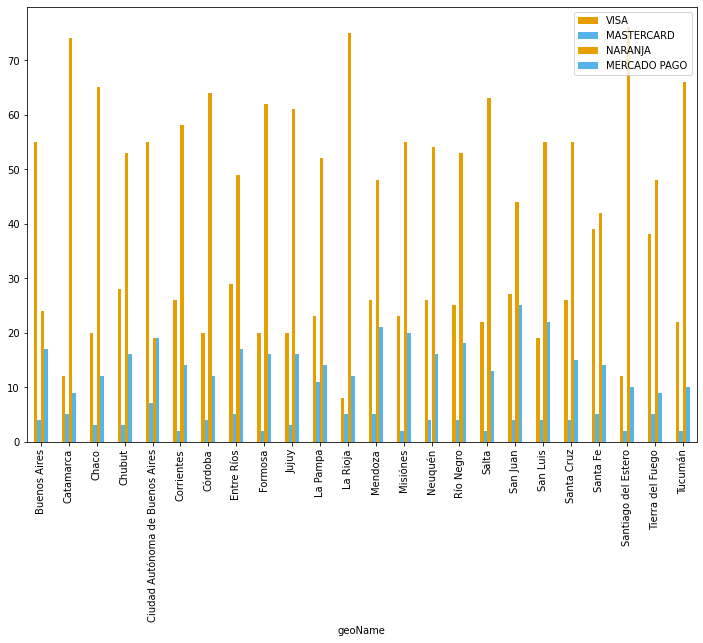

In [74]:
p2.plot(kind='bar',figsize=(12,8))

In [75]:
t2=dt2.interest_over_time()
t2

,VISA,MASTERCARD,NARANJA,MERCADO PAGO,isPartial
date,,,,,
2018-05-20,55,6,37,8,False
2018-05-27,61,7,45,9,False
2018-06-03,74,8,39,8,False
2018-06-10,54,6,37,8,False
2018-06-17,59,5,31,7,False
...,...,...,...,...,...
2023-04-09,29,5,39,23,False
2023-04-16,28,4,28,22,False
2023-04-23,32,4,39,21,False


<AxesSubplot:xlabel='date'>

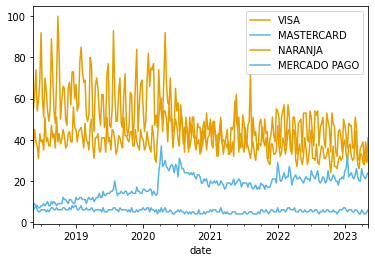

In [76]:
t2.plot()

    Vizualizamos en la linea de tiempo que al principio la tarjeta visa era la más buscada por mucha diferencia sin embargo a medida que nos acercamos más la actualidad tienen un nivel de busquedas muy similares la tarjeta visa, naranja y mercado pago. 
    Aunque esta ultima opcion no cuenta con tarjeta de credito cada vez más personas estan utilizando este medio de pago en reemplazo a las tarjetas de credito. 
    Otra observacion importante es que los bancos tienen para las tarjetas de creditos de los bancos la tarjeta Visa y Mastercad, aunque mastercard tiene un nivel de busqueda muy por debajo que el resto de las tarjetas no significa necesariamente un menor uso.
    Es importante considerar que la tarjeta naranja tiene un nivel de busqueda muy significativo sin contar con una entidad bancaria tradicional que la respalde